The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# 제 1 강 신경망을 내 손으로 만져보기(tf.keras & MNIST)

---------


## Greetings!
인공지능이나 기계학습을 이해하려면, 참 여러 가지를 알아야 합니다. 특히 수학적 개념과 프로그래밍(코딩)과 친숙해져야 합니다. 수학적 개념에서는 텐서, 미분, 경사 하강법, 행렬 연산 등등이고, 코딩도 익숙하면 익숙할수록 좋습니다. 그러나, 우리의 목적은 이 모든 것을 다 알아야 한다는 것이 아니라 수학적으로 너무 깊이 들어가지 않고, 이러한 개념들을 이해하여 결국 인공지능의 원리를 이해하는데 있습니다. 특히 수학이나 코딩을 어려워 할 수 있으므로, 수학 기호는 가능한 사용하지 않으려 합니다. 

처음에는 여러 분이 잘 알아들을 수 없는 실제 신경망 예제로 시작하면서, 그 개념을 전체적으로 몇개 소개합니다. 그 이후에 이같은 예제를 이해하기 위해서 꼭 필요한 개념들을 좀 더 자세히 깊이 있게 설명할 것입니다. 


## MNIST 데이터셋의 개요

인공지능을 개발할 때 사용할 수 있는 여러 가지 개발 딥 러닝 프레임워크(Deep Learning Framework)들이 있습니다.  현재 가장 많이 사용되고 있는 프레임워크는 두 가지로 압축할 수 있으며 모두 open source platform이며, 파이썬을 가장 기본적인 front-end로 지원합니다.  

- Tensorflow(2.x) & tf.keras: 구글에서 제공함
- PyTorch: 페이스북에서 제공함

여기서는 텐서플로와 케라스로 가장 기본적이고 "Hello World"에 해당하는 MNIST 데이터셋을 다루는 것부터 시작하도록 합니다. 


여러분은 컴퓨터 프로그래밍을 처음 배울 때를 어떤 프로그램을 제일 먼저 작성했는지 기억이 나는지요? 누구든지 어떤 프로그래밍 언어를 처음 접할 때 시도해보는 것은 "Hello World!"를 출력하는 프로그램을 작성해보는 것입니다.  일종의 전통이죠. "Hello World! 프로그램을 500개도 넘게 모아 둔 [웹사이트](http://helloworldcollection.de/)도 있더군요. 기계학습에 비슷한 전통이 생기는 것 같습니다.  기계학습을 처음 배울 때, 누구나 한번은 시도해보는 것이 바로 MNIST(엠니스트) 데이터셋을 다루는 일입니다. 

[MNIST(National Institute of Standards and Technology)자료](http://yann.lecun.com/exdb/mnist/)는 다음과 같이 손으로 쓴 숫자들의 이미지를 압축하여 한 파일에 모아둔 것입니다. 또한 각 숫자가 어떤 숫자인지 알려주는 각 (클래스)레이블 파일이 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST50419.png?raw=true" width="600">
<center>그림 1: MNIST 데이터셋의 첫 5장의 이미지</center>

이번 강의에서는 이러한 MNIST 데이터셋으로 신경망 모델을 훈련하고, 새로운 데이터셋으로 신경망 모델을 테스트해볼 것입니다. 우리의 목적은 최고의 성능을 자랑한는 신경망 모델을 만드는 것이 아니라 인위적인 자료가 아니라 범용으로 사용되는 실전 자료로 신경망을 모델링하는데 목적이 있습니다. 

## MNIST 데이터셋 시각화

다음 코드는 MNIST 데이터셋의 이미지들을 추출하여 시각화합니다. 한 줄에 최대 10장씩 100까지 시각화하고, 각 이미지 아래에 레이블(실제 값)을 표시합니다. 때때로 사람이 인식하기에도 명확하지 않은 이미지가 있습니다. 

Using TensorFlow backend.


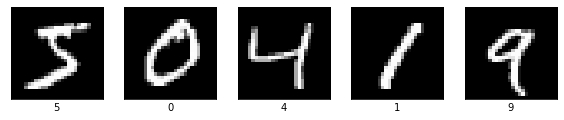

In [1]:
# this code displays upto 100 images
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

images = x_train[:5]
labels = y_train[:5]
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(10, 10, i + 1)     # display images upto 100
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    plt.xlabel(labels[i])
plt.show()

## Step 1: 학습 자료 준비 하기(전처리 과정)

텐서플로를 주피터 노트북 내에서 사용하려면, 텐서플로 라이브러리를 import해야 합니다. 
- tensorflow을 import하면, __tensorflow__라는 긴 이름을 대신 짧은 이름 __tf__를 사용할 수 있도록 다음과 같이 import하고, version도 체크할 수 있습니다. tensorflow는 2.x 버전을 사용합니다. 

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


손글씨 숫자 이미지들로 구성된 데이터셋을 가져와서 한 세트는 학습의 목적으로, 한 세트는 테스트를 위하여 각각의 변수들에 저장합니다. 

- 학습을 목적으로 저장하는 데이터 셋은 train이란 이름으로 저장되고, 테스트(검증)을 위한 데이터셋은 test란 이름으로 저장합니다. 
- x는 손글씨 숫자로 된 이미지 자료이며, y는 이미지가 의미하는 실제 숫자입니다. 이런 실제 숫자의 값을 label 혹은 target 이라 부르기도 합니다. 

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

학습 과정에 사용할 train 자료의 개수는 60000개 이고, 테스트 자료의 개수는 10000개입니다. 각 자료(sample)의 x는 가로x세로가 각각 28x28 픽셀로 구성된 grayscale 이미지이며, y는 각 이미지의 실제 값(label)을 가지고 있습니다. 다음 그림은 데이터의 상태를 잘 보여주고 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNISTdataset2.png?raw=true" width="600">
<center>그림 2: MNIST 데이터셋의 x_train 과 y_train 훈련 자료 형상</center>

파이썬을 사용하여 그의 크기와 형상(shape)을 확인할 수 있습니다.

In [5]:
print(len(x_train))
print(x_train.shape)

60000
(60000, 28, 28)


In [6]:
print(len(y_train))         # 6만개 label or target 
print(y_train)              # 6만개를 다 프린트하기 보다는 앞과 뒤의 몇개만 보여줍니다. 

60000
[5 0 4 ... 5 6 8]


#### Example 1.

x_train가 가지고 있는 6만개의 이미지 자료들 중에 첫 한 개를 출력해봅니다.  

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### Example 2: 

우리는 출력한 첫 데이타는 28 x 28 배열의 2D 텐서인 것을 알고 있습니다. 2D 텐서를 출력할 때, 디폴트 print를 사용하지 말고, 한 줄에 한 row씩, 28 x 28 형식으로 출력하도록 다음과 같이 코딩을 해봅니다. 

In [8]:
for row in x_train[0]:                    # row 
    for pix in row:                    # each element in a row
        print('%3d' % pix, end=' ')    # print('{0:3d}'.format(j), end=' ') 
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

각 숫자는 이미지 픽셀이며, 각 픽셀은 0~255사이의 값이며, 각 픽셀의 밝기 정도를 나타냅니다. 가장 작은 수 0이면 가장 어두운 검은색이며, 255는 가장 밝은 색, 흰색을 나타냅니다. 

#### Example 3: 
이제 이런 데이터의 값을 실제로 그림으로 나타내면 더 좋지 않을까요? 다행히도, 이러한 단순한 배열을 실제 이미지로 시각화할 수 있는 파이썬 표준 라이브러리인 맷플롯립(matplotlib)이 있습니다. 이 라이브러리을 import하고, imshow() 함수를 이용하여 시각화할 수 있습니다. 모든 이미지가 x_train에 저장되어 있으므로, 그 중에 첫 번째 이미지는 `x_train[0]`으로 슬라이싱하면 됩니다. 그러면, 첫 번째 이미지를 볼 수 있습니다. 

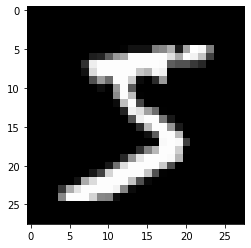

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

이 이미지를 컴퓨터는 어떻게 인식할까요? 

이 이미지는 가로 28 x 세로 28 = 총 784개로의 픽셀(pixel)로 이루어져 있습니다. 즉 이미지는 0~255까지 숫자 중의 하나로 채워진 긴 행렬로 이루어진 수의 집합으로 변환되어 컴퓨터(신경망 모델)에 입력됩니다. 

이와 같은 이미지를 여러 장, 여러 번 입력하여 신경망 모델을 학습하고자 하는 것이 목적이며, 학습하는 과정에서는 모델에게 각 이미지의 값이 무엇이라는 것을 알려주어야 합니다. 즉 위와 같은 이미지의 값이 5라는 것을 알려 줄 값이 저장되어 있는 변수가 y이며, 이를 label(레이블), 실제값고, 목표값(target value, or class)이라고도 부릅니다. 

#### Example 4: label (or target) 확인하기

각 이미지의 레이블(label or target)값을 다음의 코드로 확인할 수 있습니다.     

In [10]:
print(y_train[0])         # 첫번째 이미지의 label
print(y_train)            # 6만개를 다 프린트하기 보다는 앞과 뒤의 몇개만 보여줍니다. 

5
[5 0 4 ... 5 6 8]


- 같은 종류의 데이터인데 굳이 훈련 데이터셋과 테스트 데이터 셋으로 구별해 놓은 것은 모델을 학습할 때에는 훈련 데이터셋을 사용하기 위한 것입니다. 
- 손글씨 숫자를 분별해내는 기계학습 모델을 완성한 후, 이 모델의 예측 정확도를 평가할 때는 테스트 데이터셋을 사용하기 위함입니다. 
- 만약, 모델의 학습 과정과 정확도 평가에 동일한 데이터셋을 사용하면, 모델의 학습과정에 사용된 데이터에만 예측이 잘 되는 오버피팅(overfitting)이 발생할 수 있습니다. 

- x_train의 이미지들이 모델의 입력으로 들어가서 y_train 실제 값(레이블)이 나오도록 모델을 반복적으로 학습시켜야 합니다. 
- 학습의 결과로 모델의 각종 파라미터들이 다 정해지면, 그 모델에 x_test의 이미지들을 입력해서 얼마나 정확한 y_test값을 예측하는지 평가해보는 것입니다.  

#### Example 5: 데이터의 정규화 (Normalization)

손글씨 숫자 이미지 데이터는 0~255 사이의 값을 가집니다. 이 자료들을 모델의 학습 데이터로 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경하여 모델에 입력할 때, 더 잘 작동을 합니다. 이렇게 데이터의 폭이 클 때, 적절한 값으로 분산의 정도를 바꾸는 과정을 __데이터 정규화(normalization)__라고 합니다.  정수형의 값을 255로 나누는 것이 아니라 255.0 실수형(float type)으로 나누면, 결과는 실수형으로 산출이 됩니다. 

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0     # 0~255 이미지 값을 0 ~ 1로 정규화하기 

## Step 2: 신경망 모델 설정하기

신경망의 핵심 구성 요소들은 노드(node or neuron)와 층(layer)입니다. 여러 층들이 하나의 신경망을 구성하며, 각 층은 노드로 구성되어 있습니다. 싱경망은 입력층과 출력층, 그 두 층 사이에 한 개 혹은 여러 개의 은닉층으로 구성되어 있습니다. 다음은 여기서 사용할 가장 간단한 하나의 은닉층만 있는 3층 신경망입니다. 각 층은 여러 개의 노드로 구성되어 있습니다. 

이제 신경망의 입의자료에 대하여 전처리 작업을 마쳤는데, 입력층의 노드의 갯수는 몇개가 되나요? 입력층 노드의 수는 입력자료에 의하여 정해진다고 배웠습니다. 입력층의 노드 수는 28x28 = 784개 되어야 합니다.  아래 그림처럼 말입니다. 복잡하죠? 이것도 일부만 간단히 그린 것이랍니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/784-128-10NN.png?raw=true" width="500">
<center>그림 3: MNIST 신경망 모델의 구조(1)</center>

#### Example 1: 모델 설계하기

인공신경망을 모델을 선정하고, 은닉층의 갯수와 각 층에 사용할 노드의 수 및 활성화 함수를 설정합니다. 학습률과 드롭아웃을 설정합니다. 

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

- Sequential()은 레이어(layer, 층)를 여러 개 차례대로 쌓아서 tf.keras.Sequential 신경망 모델을 생성하여 model이라는 이름으로 저장합니다. 여기서, 우리가 설계한 모델의 입력층 노드는 784개, 은닉층 노드 128개, 출력층 노드 10개로 구성되어 있습니다. Sequential 모델은 입력과 출력이 하나이고, 층 간의 입출력이 반복되는 단순히 연결되어  있는 경우 사용합니다. 입출력이 다양할 경우, 즉 다른 입력을 중간 받는 경우는 새로운 다른 모델을 설계하여 사용하기도 있습니다. 간단한 예로 [여기](https://frhyme.github.io/machine-learning/a_model_in_keras/) 참고하십시오. 
- Flatten()은 28x28의 배열을 입력으로 받아, 784개의 요소로 구성된 1차원 배열로 변환합니다. 
- Dense()는 은닉층으로 노드 개수는 128이며, 활성화 함수로 relu로 설정합니다. Relu 활성화 함수는 비선형 함수 중의 하나입니다. Dense층은 선형적인 연산만 하기 때문에 즉 output = dot(W, input) + b 형식으로 입력에 대한 선형적인 변환(affine)만 하기 때문에 Dense 층이 여러 개 구성할지라도 Deep Learning의 장점이 없어집니다. 그러므로, 비선형 활성화 함수를 도입함으로 말미암아 가설 공간에 보다 많은 변형을 가져와 새로운 하이퍼 파라미터 값의 설정 범위가 넓어지게 됩니다. Relu 함수는 가장 많이 사용하는 대표적인 비선형 활성화 함수입니다.   
- Dropout()은 오버피팅(overfitting)을 방지하기 위해 무작위로 이전 층의 출력의 노드의 일부를 사용하지 않는 방법인데, 여기에서는 20%를 사용하지 않는 것으로 설정합니다. 
- Dense()는 출력층으로 노드 개수는 10이며, softwmax를 활성화 함수를 설정합니다. softmax를 사용하면 출력값 간의 편차가 커져서 분류하기 쉽게 됩니다. 

## Step 3: 신경망 모델 컴파일 하기

이제 사용할 알고리즘 즉 옵티마이저(optimizer)와 손실 함수(loss function), 메트릭(metrics)을 선택합니다. 

In [13]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']   
)

다음은 옵티마이저(optimizer)와 손실 함수(loss function), 메트릭(metrics)을 선택합니다. 
- 옵티마이저(최적화 함수)는 손실함수(목적함수)를 기반으로 신경망 모델을 어떻게 갱신할 것인지 결정합니다. 확률적 경사하강법(Stochastic Gradient Descent)을 개선한 알고리즘들(`adam`, `rmsprop`, `adagrad`, 등등)중에 하나인 adam으로 설정합니다. 이에 대한 자세한 설명은 [여기](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)를 참조하십시오. 입력된 자료와 손실 함수를 기반으로 신경망의 hyperparameters(가중치, 편향 등등)을 조정하는 메커니즘(알고리즘)의 일종입니다. 예를 들어, 2차원의 손실함수에 경사하강법을 적용한다면, 현재 위치의 기울기를 산출하여 에러가 최소화되는 방향으로 현재 위치를 약간씩 이동하며, 다음 번 학습(epoch)에서 나타나는 오차를 최소화하도록 합니다. 
- 손실함수는 일종의 목적함수이며, 훈련(학습)하는 동안 최소화될 값입니다. 주어진 문제에 대한 성공 지표가 되며, 이를 최소화하는 방향(목적)으로 학습이 진행됩니다. 
- 크로스 엔트로피(Cross-Entropy)를 손실 함수(loss function)로 사용합니다. 손실 함수는 학습 자료에서 신경망의 성능을 측정하는 방법으로 신경망이 옳은 방향으로 학습될 수 있도록 도와줍니다. 
- 모델의 출력이 one-hot encoding되어 있다면, categorical_crossentropy를 사용하고, 모델의 출력이 정수라면 sparse_categorical_crossentropy를 사용합니다. 이진 분류(binary classification)일 때는 binary_crossentropy를 사용합니다.  
- 메트릭은 모델을 평가할 때 사용됩니다. 여기에서는 정확도(정확히 분류된 이미지의 비율)만으로 설정하였습니다. "accuracy" 혹은 "acc"를 일정하게 사용하는 것이 중요합니다.

## Step 4: 신경망 모델 학습 하기

학습 데이터셋을 사용하여 모델을 5번 반복하여 훈련시킵니다. 학습 과정은 fit()함수를 통하여 진행하며, fit()함수는 과정중에 발생하는 데이터 이력(history)들을 반환합니다.  전체 훈련 데이터에 대해 연산(훈련)을 한 번 수행하는 것을 에포크(one epoch)라고 부릅니다. 

In [14]:
history = model.fit(x_train, y_train, epochs=5)  

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2909 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1422 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1069 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0865 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0745 - accuracy: 0.9763


학습을 진행할수록 손실(loss)은 작아지고, 정확도(accuracy)는 커지는 것을 관찰할 수 있습니다. 

## Step 4: 신경망 모델 평가 하기

학습이 완성되었으니, 이제 테스트 데이터셋을 사용하여 모델을 evaluate()함수로 평가합니다. evaluate()함수는 손실과 정확도를 반환합니다. 

In [15]:
results = model.evaluate(x_test, y_test)   # loss and accuracy

313/313 [==============================] - 0s 918us/step - loss: 0.0790 - accuracy: 0.9739


이렇게 학습을 진행했을 때, 모델 자체의 정확도는 98.1로 나왔습니다.테스트셋의 정확도는 97.9이며, 이는 학습 훈련셋의 정확도보다 약간 낮습니다. 그 차이는 과대적합(overfitting)때문입니다. 이는 기계학습 모델이 학습 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말합니다. 

## MNIST Dataset 숫자 인식을 위한 코드(tf.keras)
지금까지 과정에서 MNIST 데이터셋 숫자 인식을 위한 코드만 간추려 보면 다음과 같이 단 7줄의 코드로 요약될 수 있습니다.  

In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2589 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1117 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.98 - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0188 - accuracy: 0.9944
Epoch 10/10
313/313 [===================

[0.07853339612483978, 0.9765999913215637]

## Step 5. 분석 과정: Postprocessing

학습(훈련) 과정과 테스트 과정을 마친 후, 결과에 대해 좀 더 분석을 원할 때가 많습니다. 이를 위한 다양한 도구와 방법들이 있습니다. 

- 학습/훈련을 담당하고 있는 fit()함수는 학습 과정 중에 일어나는 손실과 정확도에 대해 저장하여 Dictionary 형식으로 반환합니다
- fit()함수를 실행할 때, 검증 자료도 함께 매개 변수로 보내서 검증 자료에 대해서도 손실과 정확도를 측정할 수 있습니다. 
- evaluate함수도 최종 손실과 정확도를 반환합니다. 
다음 코드는 이러한 기능들을 추가하였습니다. 

In [78]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'),      #은닉층
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')     #출력층
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=30)
results = model.evaluate(x_test, y_test)

(60000, 28, 28)
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9282
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - accuracy: 0.9756
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9831
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9856
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9872
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9890
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9902
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/st

In [37]:
results

[0.06967438012361526, 0.9787999987602234]

history의 내부 구조를 알기위해 keys()와 값들을 출력해보면 다음과 같습니다. 

In [38]:
print(history.history.keys())
history.history

dict_keys(['loss', 'accuracy'])


{'loss': [0.2518015503883362,
  0.11550504714250565,
  0.08304453641176224,
  0.06575553119182587,
  0.054073452949523926],
 'accuracy': [0.92535001039505,
  0.9643166661262512,
  0.9739833474159241,
  0.9792666435241699,
  0.9828166961669922]}

각 배열마다 열 개의 숫자들로 구성되어 있는데, 이것은 Epoch(반복 회수)에 따라 loss와 accuracy가 저장되어 있다는 것을 관찰할 수 있습니다 이를 시각적으로 관찰하기 위해 그래프로 그려볼 수 있습니다. 

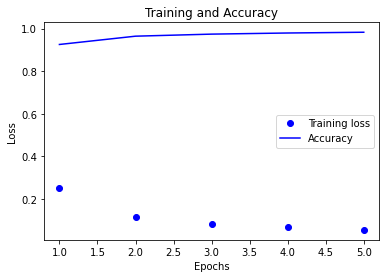

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, 1 + len(loss))            # for x, use len(loss)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Training and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

여기에서 볼 수 있듯이 훈련 손실이 epoch마다 감소하고 훈련 정확도는 증가합니다. 경사하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다.  그러나 검증(validation) 손실과 정확도는 이와 같지 않습니다. 7번째 에포크 이후부터는 그래프의 변화가 거의 없거나 오히려 역전되는 때도 있어 보입니다. 이것이 훈련 데이터셋에서 잘 작동되는 모델이 처음 보는 데이터에서는 잘 작동하지 않을 수 있으며, 이것이 바로 과대적합(overfitting)되었다고 합니다. 어느 정도의 epoch 횟수가 지난 후부터, 훈련 데이터에 과도하게 최적합되어 훈련 데이터셋에 특화된 표현을 학습하므로 훈련 데이터셋이외의 데이터에는 일반화되지 못합니다. 

이런 경우에 과대적합을 방지하기 위해서 overfitting이 일어나는 이후에 훈련을 중지할 수 있습니다. 과대적합을 피하기위한 다양한 기술들이 있습니다. 일정 비율의 노드(뉴론)을 숨기는 dropout도 이런 기술들 중의 하나입니다. 

## Step 6. 훈련된 모델로 새로운 데이터에 대해 예측하기

신경망 모델을 학습시킨 후에 이를 실전 환경에서 사용하길 원할 것입니다. predidt 함수를 사용해서 입력에 대한 숫자를 에측할 수 있습니다. x_test가 새로운 입력이라고 가정한다면, 다음과 같이 실행합니다. yhat은 에측 결과입니다. 형상을 살펴보니 10000개의 예측 결과값들이 있습니다. 각 샘플의 예측값은 10 개의 숫자로 표현되어 있습니다. 

In [59]:
yhat = model.predict(x_test)
print(x_test.shape)
print('yhat shape:', yhat.shape)
print('one sample:', yhat[0])

(10000, 28, 28)
yhat shape: (10000, 10)
one sample: [6.1061919e-15 1.1735670e-18 2.0572925e-13 1.9599398e-09 3.1325831e-21
 6.9080727e-13 1.7421662e-24 1.0000000e+00 1.0657429e-13 4.6540929e-10]


위와 같은 예측 결과를 받았을 때, 관찰을 통하여 하나의 sample `yhat[0]` 입력에 대해 에측 값이 10개의 값으로 구성되어 있는 것을 볼 수 있습니다. 물론, 이 열개의 값을 모두 더하면 1에 가까운 값이 될 것입니다. 

In [60]:
sum(yhat[0])

1.0000000024263582

그러면, 과연 이 첫번째 샘플 `yhat[0]`에 대하여 모델은 어떤 숫자라고 예측했을까요? 이 열 개의 값들 중에 가장 큰 값이 들어가 있는 배열의 인덱스가 곧 모델이 예측한 값에 해당할 것입니다. 이것을 코딩으로 구현하면 다음과 같습니다. `yhat[0]` 배열에 있는 10개의 요소를 서로 비교하면서, 최대값을 가진 요소의 인덱스를 찾는 코드입니다. 

In [61]:
max_value = yhat[0][0]
max_index = 0
for index, value in enumerate(yhat[0]):
    if value > max_value:
        max_value = value
        max_index = index

print('최대값의 인덱스:', max_index)
print('레이블', y_test[0])

최대값의 인덱스: 7
레이블 7


In [62]:
import numpy as np 
print('최대값의 인덱스:', np.argmax(yhat[0]))

최대값의 인덱스: 7


for loop를 사용하여 10000개 중에 앞에 있는 5개의 샘플에 대해서만 예측한 값을 출력해볼 수 있습니다. 여기서 y_test 레이블이 있다고 가정하고 함께 출력해서 비교해 보았습니다. 

In [84]:
for i, iyhat in enumerate(yhat):
    if (i < 5 or i == 321):
        print('[{}] = {}'.format(i, np.round(iyhat, 3)))
        predicted = np.argmax(iyhat)
        print('image={}, predicted={}, label={}'.format(i, predicted, y_test[i]))
    if i == 321:
        print("i=321", np.round(iyhat, 4))

[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
image=0, predicted=7, label=7
[1] = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
image=1, predicted=2, label=2
[2] = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
image=2, predicted=1, label=1
[3] = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
image=3, predicted=0, label=0
[4] = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
image=4, predicted=4, label=4
[321] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
image=321, predicted=7, label=2
i=321 [0.000e+00 0.000e+00 0.000e+00 1.000e-04 0.000e+00 0.000e+00 0.000e+00
 9.999e-01 0.000e+00 0.000e+00]


## Homework

#### Homework 1: 예측이 틀린 샘플들을 몇 개 있는지 찾아 보십시오.  그래서, 정확도를 계산하십시오. 

In [85]:
wrong = []
w_idx = []
w_lab = []
w_pre = []

for i, iyhat in enumerate(yhat):
    predicted = np.argmax(iyhat)
    if predicted != y_test[i]:
        wrong.append(predicted)
        w_idx.append(i)
        w_lab.append(y_test[i])
        w_pre.append(predicted)
        
print("accuracy = ", 1 - len(wrong)/len(yhat))
print(wrong[:5])
print(w_idx[:5])
print(w_lab[:5])
print(w_pre[:5])

accuracy =  0.9812
[9, 5, 2, 7, 3]
[115, 217, 247, 321, 340]
[4, 6, 4, 2, 5]
[9, 5, 2, 7, 3]


#### Pythonic Coding 

In [65]:
predicted = np.argmax(yhat, axis = 1)
print("accuracy = ", np.sum(predicted == y_test) / len(yhat))

accuracy =  0.9812


#### Homework 2: 첫 번째로 예측이 틀린 샘플은 무엇이며, 어떤 숫자를 어떻게 인식했는지 찾아내고, 레이블과 함께 시각화하십오. 

In [87]:
wrong = []
for i, iyhat in enumerate(yhat):
    predicted = np.argmax(iyhat)
    if predicted != y_test[i]:
        wrong.append((i, y_test[i], predicted))

print(len(wrong))
print(wrong[:5])
print(wrong[0][0], wrong[0][1], wrong[0][2])


188
[(115, 4, 9), (217, 6, 5), (247, 4, 2), (321, 2, 7), (340, 5, 3)]
115 4 9


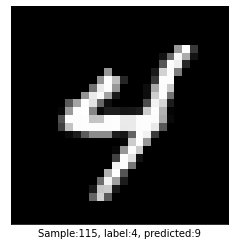

In [88]:
plt.xticks([])
plt.yticks([])
xstr = "Sample:" + str(wrong[0][0]) + ", label:" + str(wrong[0][1]) + ", predicted:" + str(wrong[0][2])
plt.xlabel(xstr)
plt.imshow(x_train[wrong[0][0]], cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

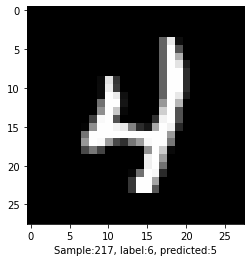

In [89]:
xstr = "Sample:" + str(wrong[1][0]) + ", label:" + str(wrong[1][1]) + ", predicted:" + str(wrong[1][2])
plt.xlabel(xstr)
plt.imshow(x_train[wrong[1][0]], cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

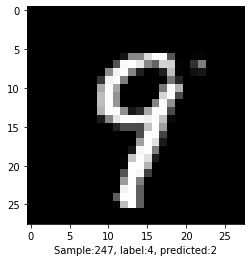

In [90]:
xstr = "Sample:" + str(wrong[2][0]) + ", label:" + str(wrong[2][1]) + ", predicted:" + str(wrong[2][2])
plt.xlabel(xstr)
plt.imshow(x_train[wrong[2][0]], cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

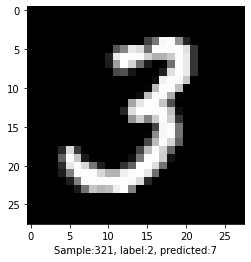

In [91]:
xstr = "Sample:" + str(wrong[3][0]) + ", label:" + str(wrong[3][1]) + ", predicted:" + str(wrong[3][2])
plt.xlabel(xstr)
plt.imshow(x_train[wrong[3][0]], cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

# Extra Study

## 1. Epoch & batch_size

배치 batch 단어의 의미는 `묶음`입니다. batch_size는 신경망 모델을 학습할 때에, 한번에 (한 묶음으로) 모델에 넘겨주는 샘플 데이터의 수를 의미합니다. 예를 들면, 1000개의 입력 데이터셋이 있는데, batch_size = 10으로 넘겨준다고 가정하면, 총 10개씩 batch로서 그룹을 이루어 들어가게 되면, 총100개의 step을 통해서 1 epoch을 학습하는 것입니다. 즉 1 epoch(학습 1회) = 10 (batch_size) * 100 (step or iteration)입니다. Epoch는 전체 데이터를 학습하는 횟수를 의미합니다. 즉, "1 Epoch = 전체 데이터 학습"을 의미합니다. 텐서플로의 학습 진행 과정의 출력을 살펴보면, 디폴트로 batch_size=32 설정되어 있다는 것을 관찰할 수 있습니다. 

In [41]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0660 - accuracy: 0.9793
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9850


In [42]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9917


In [43]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0670 - accuracy: 0.9814


[0.0669904425740242, 0.9814000129699707]

## 2. 원 핫 인코딩 one-hot encoding
위의 예제에서 y에 저장되어 있는 레이블(label or class)은 각 샘플마다 하나의 수 즉 0~9까지의 정수형 값을 갖고 있습니다. 이러한 형식의 값을 0/1로만 이루어진 벡터로 값을 수정할 수 있습니다. 예를 들면, 레이블이 3이면, `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`로 표현하고, 5이면, `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`는 것입니다. 이를 one-hot encoding이라고 합니다. 

다음 코드는 정수형의 값으로 표현된 레이블 y값을 one-hot encoding으로 변형합니다. 

In [72]:
import numpy as np
from keras.utils import np_utils

y_train_hot = np_utils.to_categorical(y_train, 10)
print(y_train.shape)
print(y_train_hot.shape)
print(y_train[0])
print(y_train_hot[0])

(60000,)
(60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


레이블 y값을 정수형에서 one-hot encoding 형식으로 변형하게 되면, 그에 따라 다른 코드들이 영향을 받습니다. 다음과 같이 compile 함수의 loss 옵션을 수정해야 합니다.  

In [45]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0       # normalization

y_train = np_utils.to_categorical(y_train, 10)      # one-hot encoding
y_test = np_utils.to_categorical(y_test, 10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',              # since using one-hot encoding
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1451 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9752
313/313 - 0s - loss: 0.0735 - accuracy: 0.9764


[0.07354003190994263, 0.9764000177383423]

## 3. 모델의 저장과 복원

tf.keras.Model.save_weights를 사용하여 모델의 가중치를 저장하고 복원합니다. 

In [46]:
# 가중치를 텐서플로의 체크포인트 파일로 저장합니다.
model.save_weights('./weights/my_model')

# 모델의 상태를 복원합니다. 모델의 구조가 동일해야 합니다.
model.load_weights('./weights/my_model')

기본적으로 모델의 가중치는 텐서플로 체크포인트 파일 포맷으로 저장됩니다. 케라스의 HDF5 포맷으로 가중치를 저장할 수도 있습니다(다양한 백엔드를 지원하는 케라스 구현에서는 HDF5가 기본 설정입니다):

In [144]:
# 가중치를 HDF5 파일로 저장합니다.
model.save_weights('my_model.h5', save_format='h5')

# 모델의 상태를 복원합니다.
model.load_weights('my_model.h5')

## 4. 활성화 함수(activation functions)

#### ReLU function 
렐루$^{ReLU}$ 함수는 Rectified Linear Unit의 약자입니다.  렐루 함수는 입력값이 0보다 작으면 0이고 0보다 크면 입력값 그대로를 내보냅니다.  

\begin{align} 
  h(x) &= 
  \begin{cases}
   \ x & \text{$if \ x \ge 0$} \\
   \ 0 & \text{$otherwise$} \\ \tag{8}
  \end{cases}
\end{align}  

렐루 함수를 그래프로 나타내면 다음과 같습니다.  `Numpy`의 `maximum`함수를 이용하였는데, 이 함수는 두 입력 중에서 큰 값을 반환합니다. 

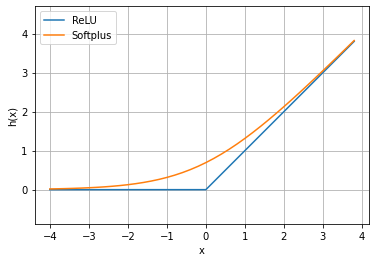

In [145]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-4.0, 4.0, 0.2)
y = relu(x)
plt.plot(x, y, label='ReLU')
y = np.log(1 + np.exp(x))
plt.plot(x, y, label='Softplus')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend(loc=2)
plt.grid(True)
plt.show()

ReLU 함수의 특징은 다음과 같습니다. 
- 0 이하의 입력에 대해 0을 출력함으로 부분적으로 활성화 시킬수 있다. 
- __소멸하는 기울기__$^{vanshing \ gradient}$ 문제가 없다. 
- 선형함수이므로 미분 계산이 간단하다.
- 입력의 크기에 무관하다$^{scale-invariant}$

기계학습에서 많이 사용하던 시그모이드를 렐루가 대체하게 된 이유 중 가장 큰 것이 __소멸하는 기울기__ 문제입니다. 시그모이드 함수는 `0`에서 `1`사이의 값을 가지는데 경사하강법을 사용하여 역전파를 할 때, 은닉층들을 지나면서 기울기$^{gradient}$를 계속 곱하므로 기울기$^{gradient}$는 `0`으로 수렴하게 됩니다. 따라서 은닉층이 많은 딥러닝에서는 잘 작동하지 않게 됩니다.

#### Sigmoid function

다음은 기계학습에서 가장 많이 사용해왔던 활성화 함수인 시그모이드 함수$^{sigmoid \ function}$를 나타내는 식입니다. 

\begin{align} 
  sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{-x}} \tag{1} \\
\end{align}

식(1)에서 $e$는 자연상수로 2.7182...의 값을 갖는 실수입니다.  시그모이드 함수는 복잡한듯 보이지만 사실 상 단순한 함수입니다.  함수는 입력이 주어지면 일정한 방법에 의해 출력을 내주는 것뿐입니다. 예를 들어 시그모이드 함수에 $0$ 입력하면, 즉 $\sigma(0)$를 하면, 식(4)에서 $x$대신 0를 대입하여 계산 결과 즉 $0.5$를 출력합니다.  $x=0, x=1$경우도 쉽게 계산할 수 있습니다. 
\begin{align} 
  \sigma(0) &= \frac{1}{1 + e^{0}} \\
                &= \frac{1}{2} \ \tag{2} \\
  \sigma(1) &= \frac{1}{1 + e^{-1}} \\
                &= \frac{1}{1 + 0.3679...} \\
                &= 0.731... \\
  \sigma(2) &= \frac{1}{1 + e^{-2}} \\
                &= \frac{1}{1 + 0.1353...} \\
                &= 0.880...
\end{align}

시그모이드 함수는 파이썬으로 다음과 같이 작성할 수 있습니다.  

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

자 그러면 이제 시그모이드 함수의 그래프를 그려볼까요? $x$축의 범위를 `-5.0`와 `5.0`사이로 잡고 그에 상응하는 시그모이드 함수 값을 $y$값을 구하여 그래프를 그린 것입니다. 

In [ ]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(axis='y')
plt.title('sigmoid function')
plt.show()

아래의 코드는 가중치`(0.5, 1.0, 2.0)`에 따른 함수의 변화를 살펴본 것입니다.  가중치가 클수록 경사도가 높은 것을 관찰할 수 있습니다.  가중치가 클수록 계단 함수와 비슷해지며, 낮을 수록 완만한 $S$ 곡선을 그리게 됩니다. 

In [ ]:
x = np.arange(-5, 5, .1)
for w, l in [(0.5, 'w = 0.5'), (1.0, 'w = 1.0'), (2.0, 'w = 2.0')]:
    y = sigmoid(x * w)
    plt.plot(x, y, label=l)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.axvline(0, color='black', linewidth=0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(axis='y')
plt.show()

시그모이드 함수는 그래프에서 관찰할 수 있듯이 S자와 유사한 완만한 시그모이드 커브 형태를 보이는 함수입니다. 이 함수는 모든 실수 입력 값을 0보다 크고 1보다 작은 미분 가능한 수로 변환하는 특징을 갖습니다. 따라서, 우리가 나중에 공부하게 될 로지스틱 분류$^{logistic \ classification}$ 문제의 가설과 비용 함수$^{cost \ function}$에 많이 사용됩니다.  또한 함수의 반환 값이 항상 `0`와 `1`사이에 있기 때문에 그 결과를 확률로 해석할 때 유용합니다.  이 함수는 미분 결과가 간결하고 사용하기 쉬우므로 기계학습 초기에 많이 사용되었습니다.  기계학습이나 딥러닝에서 노드가 임계값을 넘을 때만 출력하도록 하는 활성화 함수로 사용하기도 합니다.  


#### Softmax function
Softmax(소프트맥스)는 입력받은 값을 0~1사이의 값으로 출력하도록 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수입니다. 분류하고 싶은 클래수의 수 만큼 출력으로 구성한다. 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용됩니다. 예를 들면, MNIST 데이터셋일 경우, 0 ~ 9까지의 값들 중의 하나로 분류해야 함으로,softmax는 출력은 열 개로 분류하며, 그 중에 가장 높은 확률을 가진 요소가 예측값이 됩니다. 

소프트맥스를 수식으로 표현하면 다음과 같습니다. 

\begin{align} 
  y_k = \frac{e^{a_k}}{\sum_{i=1}^{n}{e^{a_i}}} 
\end{align}

이를 파이썬으로 구현하면 다음과 같습니다. 

In [73]:
import numpy as np
 
def softmax(a) :
    return np.exp(a) / np.sum(np.exp(a))

위 코드는 softmax식을 잘 표현하고 있지만, 컴퓨터로 계산할 때는 오버플로(overflow) 문제가 발생할 수 있다.
예를들어, exp(10)은 20,000이 넘고, exp(100)은 0이 40개가 넘는 큰 값이 되고, exp(1000)은 무한대를 뜻하는 inf가 return된다. 그리고 이런 큰 값끼리 나눗셈을 하면 결과가 불안정해진다. 오버플로는 컴퓨터가 표현할 수 있는 수의 범위가 한정되어, 너무 큰 값은 표현할 수 없는 문제입니다. 
이를 개선하기 위해 softmax 식을 다음과 같이 변형합니다. 분모와 분자에 같은 수 C를 곱하면, 소프트맥스 수식은 다음과 같이 작성할 수 있습니다. 

\begin{align} 
  y_k = \frac{e^{a_k}}{\sum_{i=1}^{n}{e^{a_i}}} &= \frac{C e^{a_k}}{C \sum_{i=1}^{n}{e^{a_i}}} \\
  &= \frac{ e^{a_k + logC} } {\sum_{i=1}^{n}{e^{a_i + logC}}} \\
   &= \frac{ e^{a_k + C'} } {\sum_{i=1}^{n}{e^{a_i + C'}}} \\
\end{align}

즉, softmax지수 함수이므로, 이를 계산할 때 어떤 수를 더하거나 빼도 결과는 바뀌지 않는다는 것입니다. 일반적으로 입력 신호 중 최대값을 빼는방식으로 합니다. 

예를들면, x에 대한 softmax를 구하는데, 첫번째 코드에서는 연산을 하면 오버플로 현상이 나타나는데, 두번째 코드에서는 입력 신호 x 값들 중에서 최대값을 각 입력값에서 빼는 방식으로 처리하여 결과를 도출할 수 있습니다. 

In [74]:
x = np.array([1010,1000,990])

np.exp(x) / np.sum(np.exp(x))
np.exp(x - np.max(x))/np.sum(np.exp(x - np.max(x)))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

이를 바탕으로 softmax 함수를 다시 구현하면 다음과 같습니다.

In [75]:
def softmax(x) :
    ex_c = np.exp(x - np.max(x))
    return ex_c / np.sum(ex_c)

softmax() 함수를 사용하면 다음과 같이 계산할 수 있습니다

In [76]:
x = np.array([0.8, 2.8, 4.5])
y = softmax(x)
 
print(y)
np.sum(y)

[0.02047655 0.15130235 0.8282211 ]


1.0

즉, softmax 함수의 출력은 0부터 1사이의 실수이며, 출력의 총합은 1입니다. 따라서 이를 "확률"로 해석할 수 있습니다. 예를 들어, 위의 예제에서 `y[0]`의 확률은 2%, `y[1]`의 확률은 15%, `y[2]`의 확률은 83%로 해석할 수 있으며, 따라서 input x는 `y[2]` class(혹은 label)에 속한다라고 결론내릴 수 있다.

-------
__Be joyful always!__ 1 Thes.5:16